In [67]:
import pandas as pd
import holoviews as hv
from prophet import Prophet
import hvplot.pandas
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
import pathlib as Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
filepath=(r"C:\Users\Weesam\Documents\School\UOFT Work\Project 2-Group-1\sample5.csv")

# Read in the CSV as a DataFrame
laundering_data=pd.read_csv(filepath)
laundering_data

,Unnamed: 0.1,Unnamed: 0,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,67687,2244693,2022/09/04 18:45,220,80FD4ABB0,45701,811953270,2316.73,Shekel,2316.73,Shekel,Cheque,0
1,236093,28714,2022/09/01 00:26,6129,803783EA0,6129,803783EA0,4.65,US Dollar,4.65,US Dollar,Reinvestment,0
2,158830,2298029,2022/09/05 00:11,217959,80BB7AAF0,221279,81163FEF0,26.15,Euro,26.15,Euro,Credit Card,0
3,308599,1370981,2022/09/02 07:41,24963,804886150,29435,80E6F68A0,1366.01,Euro,1366.01,Euro,Credit Card,0
4,362950,4289605,2022/09/09 02:02,14011,801EA7120,13516,805581330,7442.38,Euro,7442.38,Euro,Cheque,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10152,468589,3014910,2022/09/06 11:43,12,80C67D8B0,33727,80C7ECAA0,31394.07,Mexican Peso,31394.07,Mexican Peso,Credit Card,0
10153,480524,2686374,2022/09/05 19:38,18196,8031438B0,131928,80FF6AAD0,623.39,Yuan,623.39,Yuan,Cash,0
10154,169099,4196356,2022/09/08 23:06,1068,800F07400,1068,801A91CF0,14379.35,US Dollar,14379.35,US Dollar,Cheque,0
10155,238976,972523,2022/09/01 19:48,1024,8068B8B00,16450,809802750,182314.26,Euro,182314.26,Euro,Cheque,0


In [3]:
laundering_data.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [4]:
laundering_data

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/04 18:45,220,80FD4ABB0,45701,811953270,2316.73,Shekel,2316.73,Shekel,Cheque,0
1,2022/09/01 00:26,6129,803783EA0,6129,803783EA0,4.65,US Dollar,4.65,US Dollar,Reinvestment,0
2,2022/09/05 00:11,217959,80BB7AAF0,221279,81163FEF0,26.15,Euro,26.15,Euro,Credit Card,0
3,2022/09/02 07:41,24963,804886150,29435,80E6F68A0,1366.01,Euro,1366.01,Euro,Credit Card,0
4,2022/09/09 02:02,14011,801EA7120,13516,805581330,7442.38,Euro,7442.38,Euro,Cheque,0
...,...,...,...,...,...,...,...,...,...,...,...
10152,2022/09/06 11:43,12,80C67D8B0,33727,80C7ECAA0,31394.07,Mexican Peso,31394.07,Mexican Peso,Credit Card,0
10153,2022/09/05 19:38,18196,8031438B0,131928,80FF6AAD0,623.39,Yuan,623.39,Yuan,Cash,0
10154,2022/09/08 23:06,1068,800F07400,1068,801A91CF0,14379.35,US Dollar,14379.35,US Dollar,Cheque,0
10155,2022/09/01 19:48,1024,8068B8B00,16450,809802750,182314.26,Euro,182314.26,Euro,Cheque,0


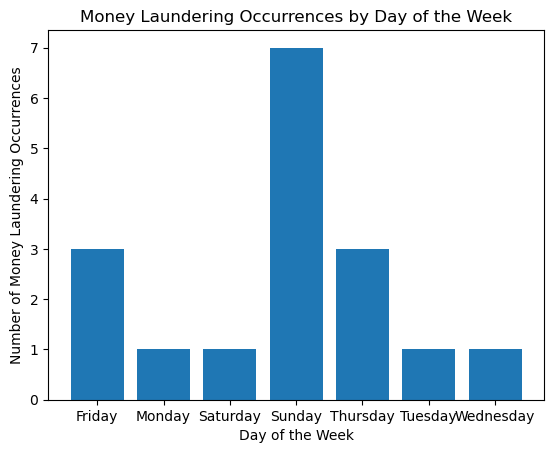

In [32]:
# Converting Timestamo to datetime and adding day of the week name
laundering_data['Timestamp'] = pd.to_datetime(laundering_data['Timestamp'])
laundering_data['Day_of_Week'] = laundering_data['Timestamp'].dt.day_name()

# Group the data by week based off the laundering days
day_of_week_counts = laundering_data[laundering_data['Is Laundering'] == 1].groupby('Day_of_Week').size()
#Plot the Data

plt.bar(day_of_week_counts.index, day_of_week_counts)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Money Laundering Occurrences')
plt.title('Money Laundering Occurrences by Day of the Week')
plt.show()

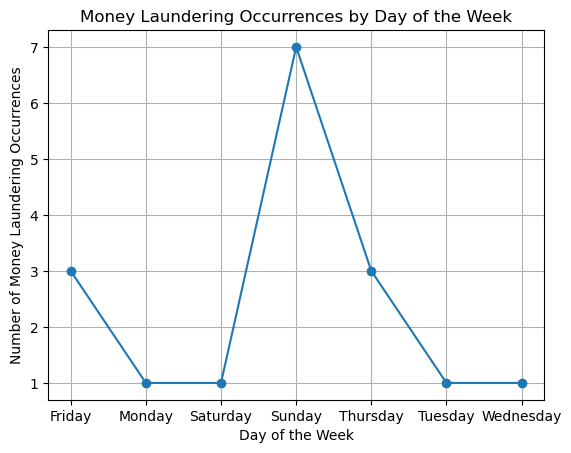

In [34]:
# Converting Timestamo to datetime and adding day of the week name
laundering_data['Timestamp'] = pd.to_datetime(laundering_data['Timestamp'])
laundering_data['Day_of_Week'] = laundering_data['Timestamp'].dt.day_name()
# Group the data by week based off the laundering days
day_of_week_counts = laundering_data[laundering_data['Is Laundering'] == 1].groupby('Day_of_Week').size()
plt.plot(day_of_week_counts.index, day_of_week_counts, marker='o', linestyle='-')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Money Laundering Occurrences')
plt.title('Money Laundering Occurrences by Day of the Week')
plt.grid(True)  
plt.show()

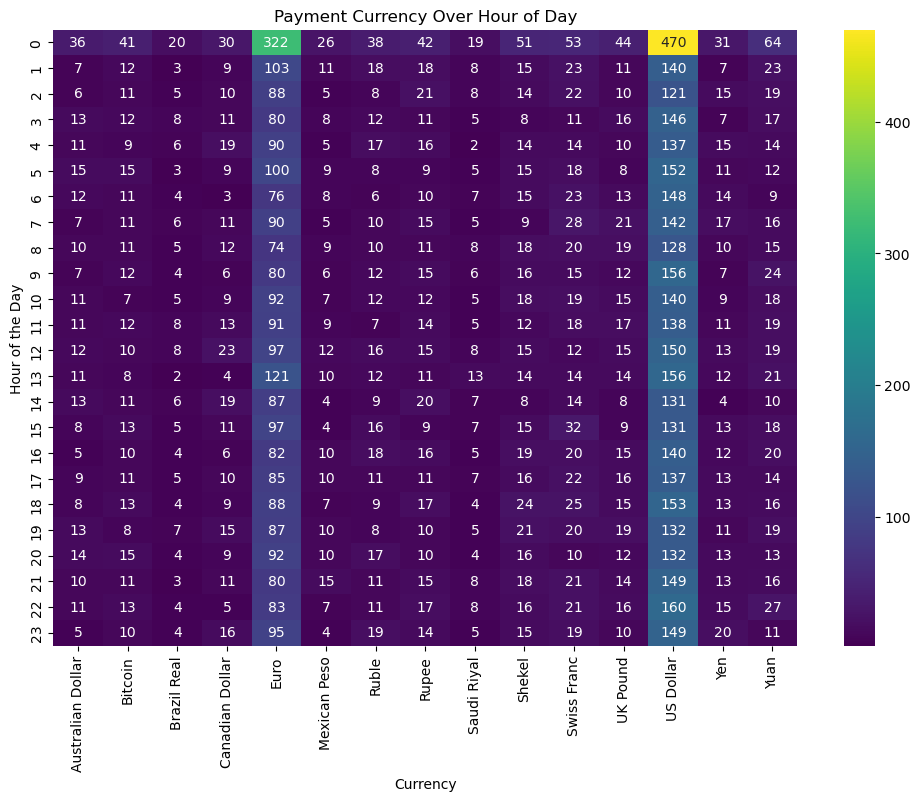

In [68]:
laundering_data['Hour'] = laundering_data['Timestamp'].dt.hour
hourly_currency_counts = laundering_data.groupby(['Hour', 'Payment Currency']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(hourly_currency_counts, cmap='viridis', annot=True, fmt='g')
plt.title('Payment Currency Over Hour of Day')
plt.xlabel('Currency')
plt.ylabel('Hour of the Day')
plt.show()


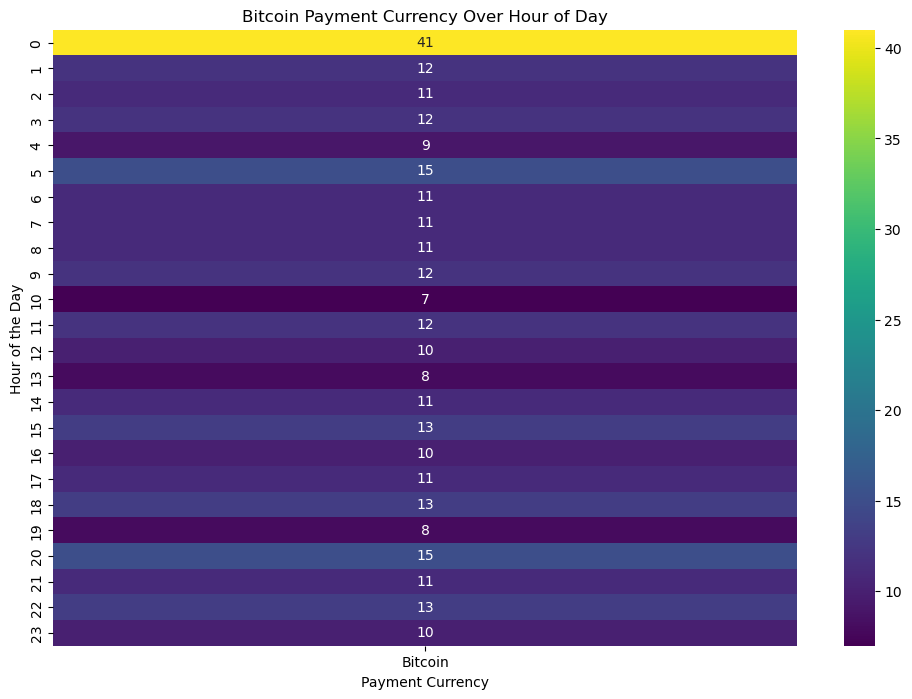

In [56]:
#Create dataframe that holds only bitcoin 
bitcoin_data = laundering_data[laundering_data['Payment Currency'] == 'Bitcoin']
#Created a pivot table for the heatmap
hourly_currency_counts = bitcoin_data.pivot_table(index='Hour', columns='Payment Currency', aggfunc='size', fill_value=0)

# Ploting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_currency_counts, cmap='viridis', annot=True, fmt='g')
plt.title('Bitcoin Payment Currency Over Hour of Day')
plt.ylabel('Hour of the Day')
plt.show()

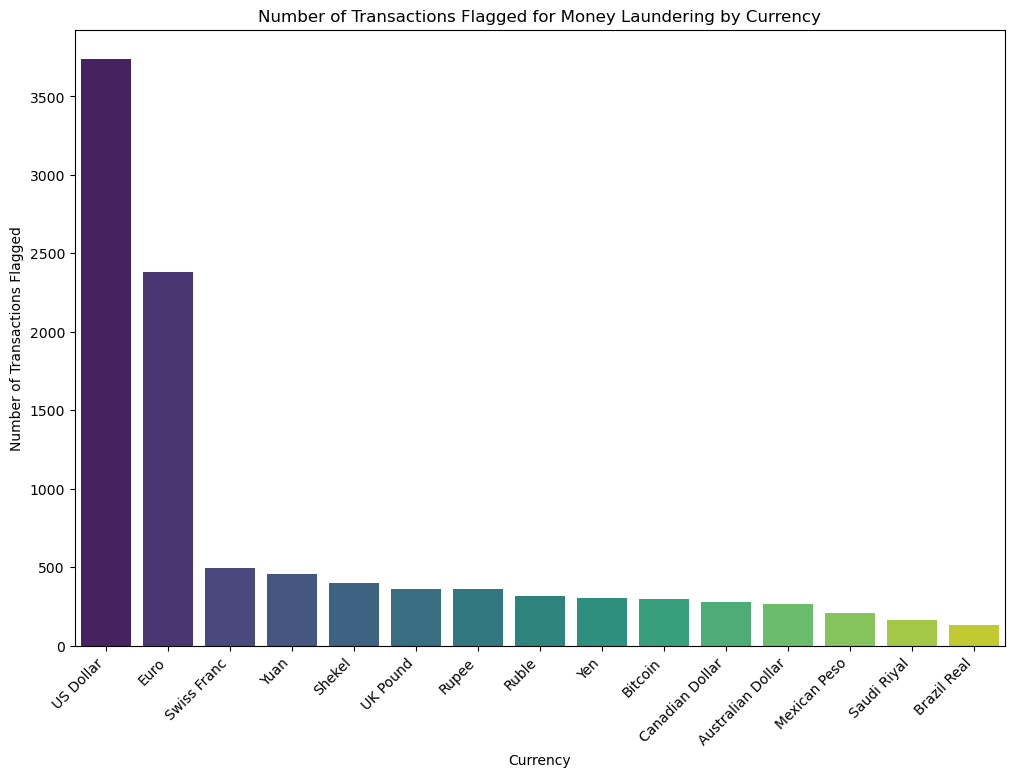

In [66]:
# Assuming your DataFrame is named df
flagged_amounts_data = laundering_data[laundering_data['Is Laundering'] == 1]

# Create a pivot table for the heatmap
currency_counts = laundering_data['Payment Currency'].value_counts()

# Plot a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=currency_counts.index, y=currency_counts.values, palette='viridis')
plt.title('Number of Transactions Flagged for Money Laundering by Currency')
plt.xlabel('Currency')
plt.ylabel('Number of Transactions Flagged')
plt.xticks(rotation=45, ha='right') 
plt.show()

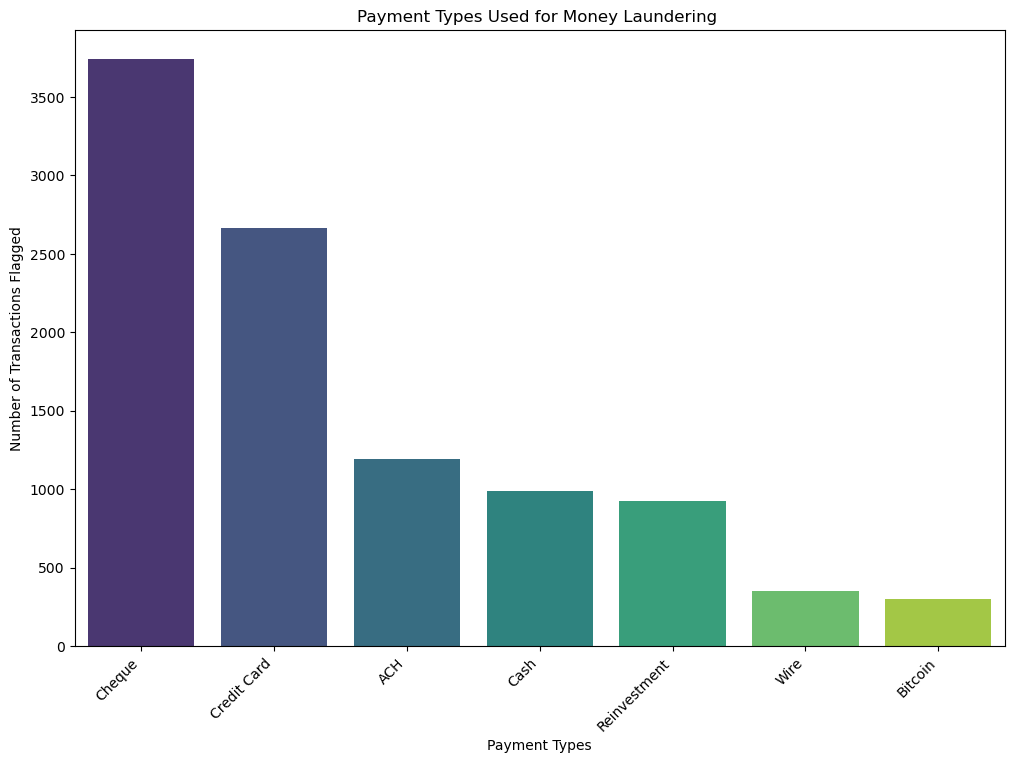

In [70]:
# Assuming your DataFrame is named df
payment_type_data = laundering_data[laundering_data['Is Laundering'] == 1]

# Create a pivot table for the heatmap
payments_types = laundering_data['Payment Format'].value_counts()

# Plot a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=payments_types.index, y=payments_types.values, palette='viridis')
plt.title('Payment Types Used for Money Laundering ')
plt.xlabel('Payment Types')
plt.ylabel('Number of Transactions Flagged')
plt.xticks(rotation=45, ha='right') 
plt.show()